# Homework 2 DenseNet121

## Loading Libraries

In [1]:
# Importing Libraries



# Basic Libraries #############################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import datetime
import time


# For Feature Engineering #####################################################################


# For Machine Learning Techniques #############################################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input


# For Data Anaylsis ###########################################################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Personal Preference #########################################################################
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

### Setting GPU

In [2]:
# Change to markdown if gpu is not set up

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8540945073665682338
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6273040384
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3211552831913502720
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:02:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


## Loading Data

In [3]:
# Setting Class Names

class_names=['airplane','automobile','bird','cat','deer',
             'dog','frog','horse','ship','truck']


In [4]:
# Loading the Dataset

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [5]:
# Normalizing the Images

x_train=x_train/255.0
print(x_train.shape)

x_test=x_test/255.0
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Splitting the Data

In [6]:
# 10% of the Orginal Dataset

x_train10, not_needed1, y_train10, not_needed2 = train_test_split(
    x_train, y_train, test_size=0.90, random_state=42)

In [7]:
# 50% of the Orginal Dataset

x_train50, not_needed1, y_train50, not_needed2 = train_test_split(
    x_train, y_train, test_size=0.50, random_state=42)

In [8]:
# 80% of the Orginal Dataset (redundant)

x_train80, not_needed1, y_train80, not_needed2 = train_test_split(
    x_train, y_train, test_size=0.20, random_state=42)

## Setting up Models

In [9]:
# Creating the actual model

model_10 = tf.keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling=None,
    classes=1000,)




In [10]:
# Setting up Mutiple Models

model_50 = model_10

model_80 = model_10


In [11]:
# Model Compiling

model_10.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="Adam", metrics=["sparse_categorical_accuracy"])

model_50.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="Adam", metrics=["sparse_categorical_accuracy"])

model_80.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="Adam", metrics=["sparse_categorical_accuracy"])


## Training the Models

In [12]:
# Fitting the 10% Model

model_10.fit(x_train10,y_train10,epochs=25, batch_size=32, validation_split=0.2)
#history10 = model_10.fit(x_train10,y_train10,epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25
125/125 [==============================] - 25s 102ms/step - loss: 2.1293 - sparse_categorical_accuracy: 0.2977 - val_loss: 2.8671 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/25
125/125 [==============================] - 10s 83ms/step - loss: 1.7252 - sparse_categorical_accuracy: 0.3710 - val_loss: 4.1474 - val_sparse_categorical_accuracy: 0.0990
Epoch 3/25
125/125 [==============================] - 10s 84ms/step - loss: 1.5500 - sparse_categorical_accuracy: 0.4310 - val_loss: 3.3151 - val_sparse_categorical_accuracy: 0.1910
Epoch 4/25
125/125 [==============================] - 11s 87ms/step - loss: 1.4245 - sparse_categorical_accuracy: 0.4697 - val_loss: 1.6720 - val_sparse_categorical_accuracy: 0.4000
Epoch 5/25
 79/125 [=================>............] - ETA: 3s - loss: 1.3120 - sparse_categorical_accuracy: 0.5320

KeyboardInterrupt: 

In [ ]:
# Fitting the 50% Model

model_50.fit(x_train50,y_train50,epochs=25, batch_size=32, validation_split=0.2)
#history50 = model_50.fit(x_train50,y_train50,epochs=25, batch_size=32, validation_split=0.2)


In [14]:
# Fitting the 80% Model

model_80.fit(x_train80,y_train80,epochs=25, batch_size=32, validation_split=0.2)
#history80 = model_80.fit(x_train80,y_train80,epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25
1000/1000 [==============================] - 75s 75ms/step - loss: 0.5142 - sparse_categorical_accuracy: 0.8465 - val_loss: 0.5194 - val_sparse_categorical_accuracy: 0.8328
Epoch 2/25
1000/1000 [==============================] - 66s 66ms/step - loss: 0.2670 - sparse_categorical_accuracy: 0.9132 - val_loss: 0.8483 - val_sparse_categorical_accuracy: 0.7550
Epoch 3/25
1000/1000 [==============================] - 66s 66ms/step - loss: 0.1871 - sparse_categorical_accuracy: 0.9354 - val_loss: 1.0471 - val_sparse_categorical_accuracy: 0.7290
Epoch 4/25
1000/1000 [==============================] - 65s 65ms/step - loss: 0.1455 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.7504 - val_sparse_categorical_accuracy: 0.7970
Epoch 5/25
1000/1000 [==============================] - 68s 68ms/step - loss: 0.1210 - sparse_categorical_accuracy: 0.9590 - val_loss: 1.0309 - val_sparse_categorical_accuracy: 0.7558
Epoch 6/25
1000/1000 [==============================] - 65s 65ms/step - loss: 0.

## Plotting the Models

In [72]:
# Test Error

temp={}
temp1={}
temp2={}

score = model_10.evaluate(x_test, y_test, verbose=0)
temp["DenseNet121 10% Test error"] = 1-score[1]
performance = pd.DataFrame([temp]).T

score = model_50.evaluate(x_test, y_test, verbose=0)
temp1["DenseNet121 50% Test error"]=1-score[1]
performance1 = pd.DataFrame([temp1]).T
performance = performance.append(performance1)

score = model_80.evaluate(x_test, y_test, verbose=0)
temp2["DenseNet121 80% Test error"]=1-score[1]
performance2 = pd.DataFrame([temp2]).T
performance = performance.append(performance2)

performance

,0
DenseNet121 10% Test error,0.2593
DenseNet121 50% Test error,0.2593
DenseNet121 80% Test error,0.2593


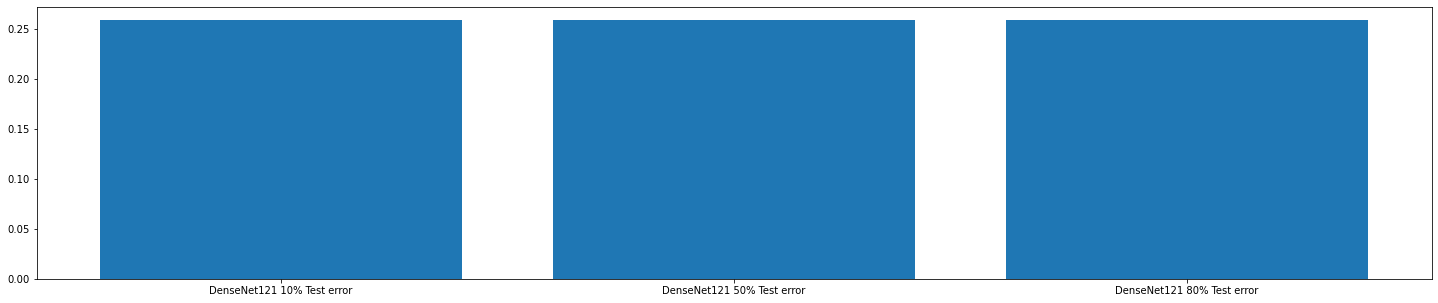

In [77]:
# Plotting Bar Plot

names = ('DenseNet121 10% Test error', 'DenseNet121 50% Test error',
         'DenseNet121 80% Test error')

values = (0.2593,0.2593,0.2593)

fig = plt.figure(figsize = (25,5))
plt.bar(names, values)
plt.show()

### Plotting the 10% Model

plt.plot(history10.history['loss'])
plt.title('Model 10% Top-1 Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

### Plotting the 50% Model

plt.plot(history50.history['loss'])
plt.title('Model 50% Top-1 Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

### Plotting the 80% Model

plt.plot(history80.history['loss'])
plt.title('Model 80% Top-1 Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

# Homework 2 My Model

## Setting up the Model

In [27]:
# Designing the Model


custom_model=tf.keras.models.Sequential()

# Convultions ################################################################################

# First Layer
custom_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", 
                                         activation="relu", input_shape=[32,32,3]))

# Max Pooling Layer
custom_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Third Layer
custom_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", 
                                         activation="relu"))

# Max Pooling Layer
custom_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Flattening Layer
custom_model.add(tf.keras.layers.Flatten())

# Droput Layer
custom_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))


# Neural Network ##############################################################################

# Adding the first fully connected layer
custom_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output Layer
custom_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

custom_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4096)             

In [29]:
# Setting up the Different Versions

custom_model_10 = custom_model
custom_model_50 = custom_model
custom_model_80 = custom_model

In [30]:
# Compiling Models

custom_model_10.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="Adam", metrics=["sparse_categorical_accuracy"])

custom_model_50.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="Adam", metrics=["sparse_categorical_accuracy"])

custom_model_80.compile(loss="sparse_categorical_crossentropy", 
                      optimizer="Adam", metrics=["sparse_categorical_accuracy"])

## Training My Models

In [43]:
# Train 10% Model

custom_model_10.fit(x_train10,y_train10,epochs=25,batch_size=32, validation_split=0.2)
#history10_2 = custom_model_10.fit(x_train10,y_train10,epochs=25,batch_size=32, validation_split=0.2)

Epoch 1/25
125/125 [==============================] - 1s 6ms/step - loss: 1.2872 - sparse_categorical_accuracy: 0.6367 - val_loss: 0.9469 - val_sparse_categorical_accuracy: 0.6790
Epoch 2/25
125/125 [==============================] - 0s 4ms/step - loss: 0.9378 - sparse_categorical_accuracy: 0.6905 - val_loss: 0.9234 - val_sparse_categorical_accuracy: 0.6890
Epoch 3/25
125/125 [==============================] - 0s 4ms/step - loss: 0.7558 - sparse_categorical_accuracy: 0.7442 - val_loss: 0.8971 - val_sparse_categorical_accuracy: 0.7130
Epoch 4/25
125/125 [==============================] - 1s 4ms/step - loss: 0.6541 - sparse_categorical_accuracy: 0.7740 - val_loss: 0.9213 - val_sparse_categorical_accuracy: 0.6970
Epoch 5/25
125/125 [==============================] - 0s 4ms/step - loss: 0.5543 - sparse_categorical_accuracy: 0.8012 - val_loss: 0.9280 - val_sparse_categorical_accuracy: 0.7070
Epoch 6/25
125/125 [==============================] - 0s 4ms/step - loss: 0.4811 - sparse_categorica

In [44]:
# Train 50% Model

custom_model_50.fit(x_train50,y_train50,epochs=25,batch_size=32, validation_split=0.2)
#history50_2 = custom_model_50.fit(x_train50,y_train50,epochs=25,batch_size=32, validation_split=0.2)

Epoch 1/25
625/625 [==============================] - 3s 4ms/step - loss: 0.5159 - sparse_categorical_accuracy: 0.8339 - val_loss: 0.2590 - val_sparse_categorical_accuracy: 0.9354
Epoch 2/25
625/625 [==============================] - 2s 4ms/step - loss: 0.3501 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.2824 - val_sparse_categorical_accuracy: 0.9204
Epoch 3/25
625/625 [==============================] - 2s 4ms/step - loss: 0.2727 - sparse_categorical_accuracy: 0.9060 - val_loss: 0.2877 - val_sparse_categorical_accuracy: 0.9198
Epoch 4/25
625/625 [==============================] - 2s 4ms/step - loss: 0.2629 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.3217 - val_sparse_categorical_accuracy: 0.9064
Epoch 5/25
625/625 [==============================] - 2s 4ms/step - loss: 0.2354 - sparse_categorical_accuracy: 0.9194 - val_loss: 0.3758 - val_sparse_categorical_accuracy: 0.8918
Epoch 6/25
625/625 [==============================] - 2s 4ms/step - loss: 0.2147 - sparse_categorica

In [45]:
# Train 80% Model

custom_model_80.fit(x_train80,y_train80,epochs=25,batch_size=32, validation_split=0.2)
#history80_2 = custom_model_80.fit(x_train80,y_train80,epochs=25,batch_size=32, validation_split=0.2)

Epoch 1/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4244 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.3612 - val_sparse_categorical_accuracy: 0.8870
Epoch 2/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3340 - sparse_categorical_accuracy: 0.8895 - val_loss: 0.3338 - val_sparse_categorical_accuracy: 0.8940
Epoch 3/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2856 - sparse_categorical_accuracy: 0.9054 - val_loss: 0.3433 - val_sparse_categorical_accuracy: 0.8953
Epoch 4/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2596 - sparse_categorical_accuracy: 0.9113 - val_loss: 0.3610 - val_sparse_categorical_accuracy: 0.8848
Epoch 5/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2546 - sparse_categorical_accuracy: 0.9133 - val_loss: 0.3710 - val_sparse_categorical_accuracy: 0.8880
Epoch 6/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2404 - spars

## Plotting the Loss of My Model

In [58]:
## Test Error


temp3={}
temp4={}
temp5={}

score = custom_model_10.evaluate(x_test, y_test, verbose=0)
temp3["Custom 10% Test error"]=1-score[1]
performance3 = pd.DataFrame([temp3]).T
performance = performance.append(performance3)

score2 = custom_model_50.evaluate(x_test, y_test, verbose=0)
temp4["Custom 50%  Test error"]=1-score[1]
performance4 = pd.DataFrame([temp4]).T
performance = performance.append(performance4)

score3 = custom_model_80.evaluate(x_test, y_test, verbose=0)
temp5["Custom 80%  Test error"]=1-score[1]
performance5 = pd.DataFrame([temp5]).T
performance = performance.append(performance5)

performance

,0
DenseNet121 10% Test error,0.2593
DenseNet121 50% Test error,0.2593
DenseNet121 80% Test error,0.2593
Custom 10% Test error,0.2862
Custom 50% Test error,0.2862
Custom 80% Test error,0.2862


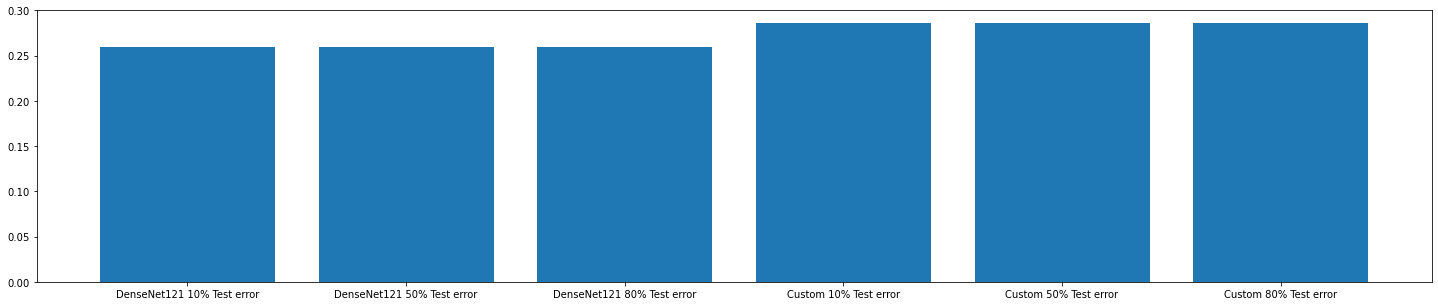

In [76]:
# Plotting Bar Plot

names = ('DenseNet121 10% Test error', 'DenseNet121 50% Test error',
         'DenseNet121 80% Test error','Custom 10% Test error',
         'Custom 50% Test error','Custom 80% Test error')

values = (0.2593,0.2593,0.2593,0.2862,0.2862,0.2862)

fig = plt.figure(figsize = (25,5))
plt.bar(names, values)
plt.show()

# Plotting the 10% Model

plt.plot(history10_2.history['loss'])
plt.title('Model 10% Top-1 Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

# Plotting the 50% Model

plt.plot(history50_2.history['loss'])
plt.title('Model 50% Top-1 Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

# Plotting the 80% Model

plt.plot(history80_2.history['loss'])
plt.title('Model 80% Top-1 Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()